In [10]:
%matplotlib notebook
import json
import convert_json
import numpy as np
import graph_utils
from graph import VertexType
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# Testing code
with open('data/round1.json', 'r') as f:
    x = json.load(f)

test_graph = convert_json.as_graph(x)
test_graph.weights = np.array([
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 1e2, 1e2
])
test_graph.update_edges()

# Create the g2o object and optimize
test_graph.generate_unoptimized_graph()
original_tags = graph_utils.get_tags_all_position_estimate(test_graph)
original_map = graph_utils.optimizer_to_map(
        test_graph.vertices, test_graph.unoptimized_graph)
test_graph.optimize_graph()

# Change vertex estimates based off the optimized graph
test_graph.update_vertices()

resulting_map = graph_utils.optimizer_to_map(
    test_graph.vertices, test_graph.optimized_graph)

original_locations = original_map['locations']
original_tag_verts = original_map['tags']

locations = resulting_map['locations']
tag_verts = resulting_map['tags']

<IPython.core.display.Javascript object>


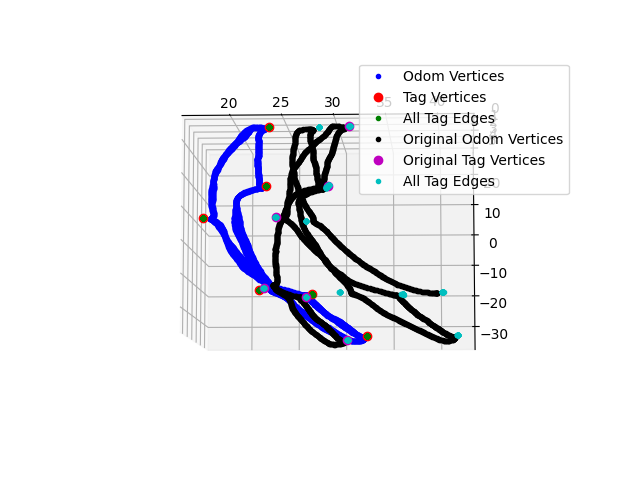

In [11]:
edges = graph_utils.ordered_odometry_edges(test_graph)[0]
path = graph_utils.integrate_path(test_graph, edges, [
    2.38298111e+01,  6.18518412e-01, - 2.23812237e+01,
    -1.15648886e-02, 1.37184479e-01,  7.07669616e-01, -6.93001000e-01
])

tags = graph_utils.get_tags_all_position_estimate(test_graph)
    
f = plt.figure()
f.add_subplot(111, projection='3d')
plt.plot(locations[:, 0], locations[:, 1], locations[:, 2], '.', c='b', label='Odom Vertices')
plt.plot(tag_verts[:, 0], tag_verts[:, 1], tag_verts[:, 2], 'o', c='r', label='Tag Vertices')
plt.plot(tags[:, 0], tags[:, 1], tags[:, 2], '.', c='g', label='All Tag Edges')
plt.plot(original_locations[:, 0], original_locations[:, 1], original_locations[:, 2], '.', c='k', label='Original Odom Vertices')
plt.plot(original_tag_verts[:, 0], original_tag_verts[:, 1], original_tag_verts[:, 2], 'o', c='m', label='Original Tag Vertices')
plt.plot(original_tags[:, 0], original_tags[:, 1], original_tags[:, 2], '.', c='c', label='All Tag Edges')
plt.legend()
plt.savefig('optimized.png')
plt.show()